<a href="https://colab.research.google.com/github/alencar-heitor/Colab-Notebook/blob/main/B3_Trade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from math import *
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
dados_hist = pd.read_csv('/content/drive/MyDrive/DSA/Datasets/ITSA4.csv')
dados_hist.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,0.969856,1.089143,0.964670,1.032093,0.548771,10799362.0
1,2000-01-04,0.995788,0.995788,0.933551,0.933551,0.496375,12675326.0
2,2000-01-05,0.938738,1.011347,0.902433,1.011347,0.537740,9621184.0
3,2000-01-06,1.006161,1.032093,1.000974,1.026906,0.546013,24240133.0
4,2000-01-07,1.037279,1.052838,1.011347,1.021720,0.543255,11776899.0


In [ ]:
print(dados_hist.info(), '\n')
print(dados_hist.shape, '\n')
print(dados_hist.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5558 entries, 0 to 5557
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5558 non-null   object 
 1   Open       5557 non-null   float64
 2   High       5557 non-null   float64
 3   Low        5557 non-null   float64
 4   Close      5557 non-null   float64
 5   Adj Close  5557 non-null   float64
 6   Volume     5557 non-null   float64
dtypes: float64(6), object(1)
memory usage: 304.1+ KB
None 

(5558, 7) 

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64


In [ ]:
print(dados_hist[dados_hist.isna().any(axis=1)])

            Date  Open  High  Low  Close  Adj Close  Volume
1261  2004-11-02   NaN   NaN  NaN    NaN        NaN     NaN


In [ ]:
dados_hist['Date'] = pd.to_datetime(dados_hist['Date'])
dados_hist.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [ ]:
serie = dados_hist[(dados_hist['Date'] > '2014-01-30') & (dados_hist['Date'] < '2022-02-11')]
print(serie.shape, '\n')
print(serie.isna().sum(), '\n')
print(serie.dtypes)

(1994, 7) 

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64 

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object


Text(0.5, 1.0, 'IBOV')

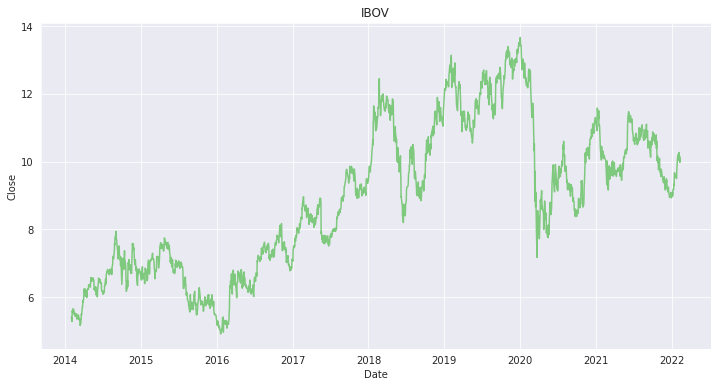

In [ ]:
#print(sns.__version__)
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='Date', y='Close', data=serie)
ax.figure.set_size_inches(12,6)
ax.set_title('IBOV')

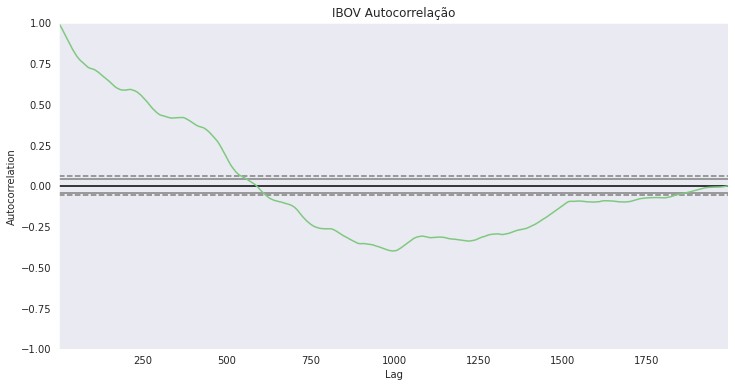

In [ ]:
from pandas.plotting import autocorrelation_plot
ac = autocorrelation_plot(serie['Close'])
ac.figure.set_size_inches(12,6)
ac = ac.set_title('IBOV Autocorrelação')

(0.0, 50.0)

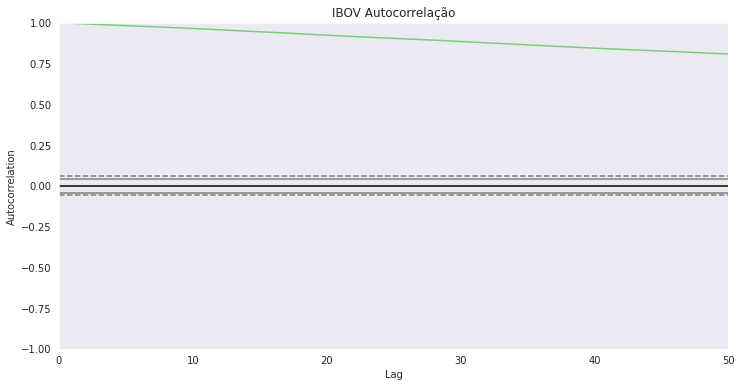

In [ ]:
ac = autocorrelation_plot(serie['Close'])
ac.figure.set_size_inches(12,6)
ac = ac.set_title('IBOV Autocorrelação')
plt.xlim(0,50)

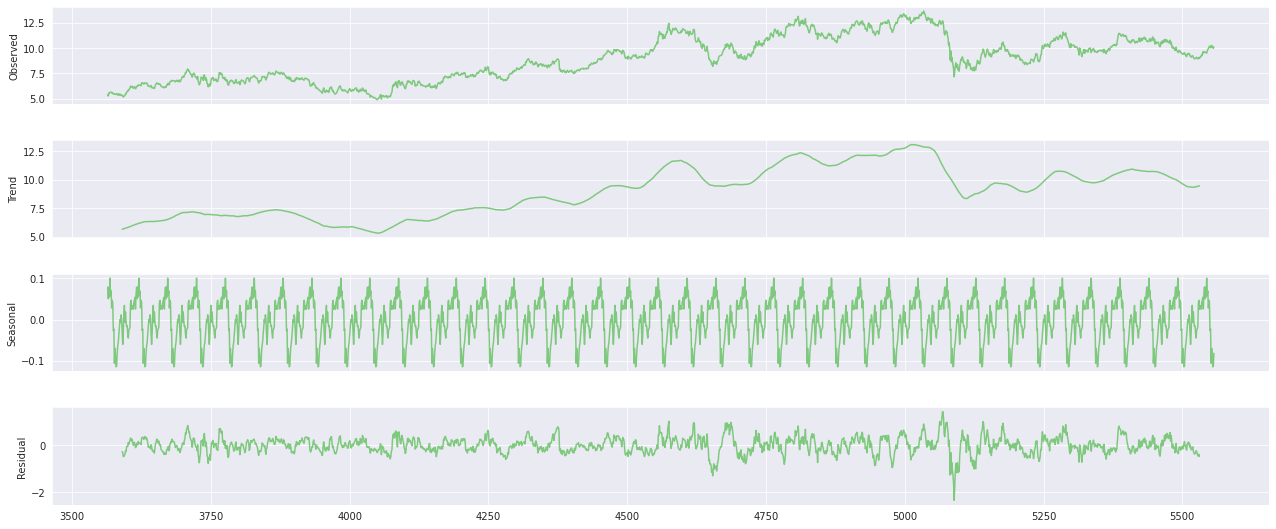

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposicao = seasonal_decompose(serie['Close'], freq=52)
fig = decomposicao.plot()
fig.set_size_inches(20,8)


In [ ]:
from sklearn.preprocessing import StandardScaler
print(decomposicao.seasonal.max())
print(decomposicao.seasonal.min())


0.10057364704744322
-0.11446641480286808


In [ ]:
serie['Pct_Change'] = serie['Close'].pct_change()
seasonalRange = decomposicao.seasonal.max() - decomposicao.seasonal.min()
serie['Seasonal'] = decomposicao.seasonal/(seasonalRange + 0.0000001)
serie.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Pct_Change,Seasonal
3564,2014-01-31,5.278625,5.458432,5.252938,5.407058,3.494159,24910283.0,NaN,0.365741
3565,2014-02-03,5.394215,5.426323,5.240095,5.278625,3.411162,24498865.0,-0.023753,0.235063
3566,2014-02-04,5.471275,5.638239,5.458432,5.586866,3.610356,49001623.0,0.058394,0.367746
3567,2014-02-05,5.593287,5.593287,5.439167,5.554757,3.589605,19041263.0,-0.005747,0.255597
3568,2014-02-06,5.561179,5.708878,5.548335,5.638239,3.643552,21229318.0,0.015029,0.467697


Text(0.5, 1.0, 'IBOV Close PCT_Change')

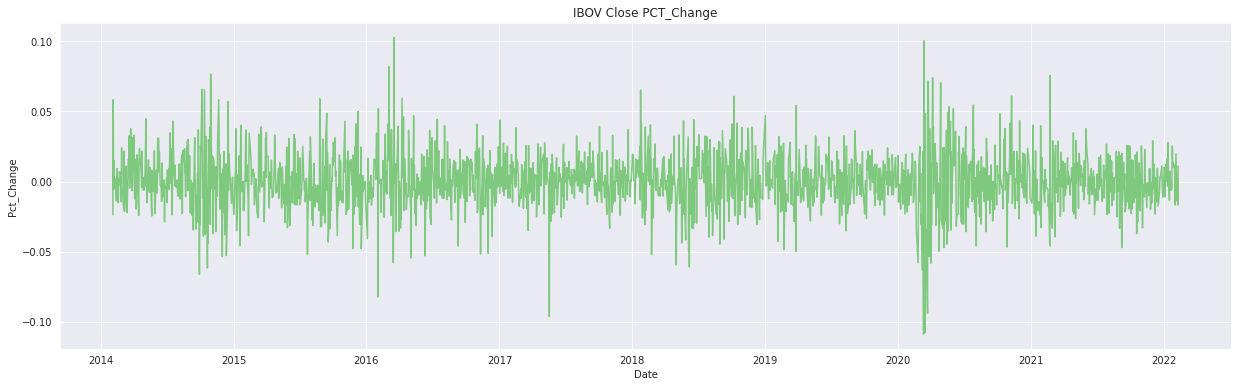

In [ ]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='Date', y='Pct_Change', data=serie)
ax.figure.set_size_inches(21,6)
ax.set_title('IBOV Close PCT_Change')

In [ ]:
#sns.pairplot(serie[serie.columns], hue='Pct_Change')

In [ ]:
print(serie.Pct_Change.mean())
print(serie.Pct_Change.std())

0.0005139214469928747
0.020040197605494282


In [ ]:
import numpy as np
serie['Label'] = np.where(serie['Pct_Change'] < -0.01, 0, np.where(serie['Pct_Change'] > 0.01, 1, 0))
#serie['Label'] = np.where(serie['Pct_Change'] > 0.015, '> 1.5%', serie['Label'])
#serie['Label'] = np.where(serie['Label'] == None, '0%', serie['Label'])
print(serie.groupby(['Label']).count())

serie.head()

       Date  Open  High   Low  Close  Adj Close  Volume  Pct_Change  Seasonal
Label                                                                        
0      1435  1435  1435  1435   1435       1435    1435        1434      1435
1       559   559   559   559    559        559     559         559       559


,Date,Open,High,Low,Close,Adj Close,Volume,Pct_Change,Seasonal,Label
3564,2014-01-31,5.278625,5.458432,5.252938,5.407058,3.494159,24910283.0,NaN,0.365741,0
3565,2014-02-03,5.394215,5.426323,5.240095,5.278625,3.411162,24498865.0,-0.023753,0.235063,0
3566,2014-02-04,5.471275,5.638239,5.458432,5.586866,3.610356,49001623.0,0.058394,0.367746,1
3567,2014-02-05,5.593287,5.593287,5.439167,5.554757,3.589605,19041263.0,-0.005747,0.255597,0
3568,2014-02-06,5.561179,5.708878,5.548335,5.638239,3.643552,21229318.0,0.015029,0.467697,1


In [ ]:
#sns.pairplot(serie[serie.columns], hue='Label')

In [ ]:
#df_model = serie.drop(['Adj Close','Volume'], axis=1)
df_model = serie[['Date', 'Pct_Change']]
df_model['OC'] = serie['Open'] - serie['Close']
df_model['HL'] = serie['High'] - serie['Low']
df_model['OC-HL'] = abs(df_model.OC / df_model.HL)
df_SMA = pd.DataFrame()
for SMA in [3,5,8,21,50,100, 200]:
  df_SMA['SMA{}'.format(SMA)] = serie.Close.rolling(SMA).mean()
#df_model['OC-HL'] = df_model['OC-HL']**2
#df_model = df_model.drop(['Open','Close', 'High','Low', 'Label'], axis=1)
#df_model = df_model.dropna()
for SMA in [3,5,8,21,50,100, 200]:
  df_model['C-SMA{}'.format(SMA)] = np.where(df_SMA['SMA{}'.format(SMA)].isna(), df_SMA['SMA{}'.format(SMA)], np.where(serie.Close > df_SMA['SMA{}'.format(SMA)], 1, 0))

previousSMA = 0
for SMA in [3,5,8,21,50,100, 200]:
  if SMA > 3:
    df_model['XSMA{}-{}'.format(previousSMA, SMA)] = np.where(df_SMA['SMA{}'.format(SMA)].isna(), df_SMA['SMA{}'.format(SMA)], np.where(df_SMA['SMA{}'.format(previousSMA)] > df_SMA['SMA{}'.format(SMA)], 1, 0))
  previousSMA = SMA
#print(df_SMA.loc[[446]])
df_model['Label'] = serie.Label
df_model.dropna(inplace=True)
df_model.Label = df_model.Label.shift(-1, axis=0)
df_model.set_index('Date', inplace=True)
#df_model
df = df_model.iloc[-1,:-1]
df

Pct_Change     0.011022
OC            -0.110000
HL             0.210000
OC-HL          0.523810
C-SMA3         1.000000
C-SMA5         0.000000
C-SMA8         0.000000
C-SMA21        1.000000
C-SMA50        1.000000
C-SMA100       1.000000
C-SMA200       0.000000
XSMA3-5        0.000000
XSMA5-8        1.000000
XSMA8-21       1.000000
XSMA21-50      1.000000
XSMA50-100     0.000000
XSMA100-200    0.000000
Name: 2022-02-10 00:00:00, dtype: float64

In [ ]:
from numpy.ma.core import shape
df_model.dropna(inplace=True)
df_t = df_model[(df_model.index > '2020-12-31') & (df_model.index < '2022-02-10')]
X = df_t.drop('Label', axis=1)
y = df_t['Label']

SEED = 24
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, random_state=SEED) # padrão 0.25
'''print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)'''
print(df_t.groupby(['Label']).count())

       Pct_Change   OC   HL  ...  XSMA21-50  XSMA50-100  XSMA100-200
Label                        ...                                    
0.0           206  206  206  ...        206         206          206
1.0            69   69   69  ...         69          69           69

[2 rows x 17 columns]


In [ ]:
from sklearn.svm import SVC
from sklearn.feature_selection import mutual_info_classif, SelectKBest
mutualclassif = SelectKBest(score_func=mutual_info_classif, k=17)
fit = mutualclassif.fit(X,y)
cols = fit.get_support(indices=True)
df_t.iloc[:,cols]

,Pct_Change,OC,HL,OC-HL,C-SMA3,C-SMA5,C-SMA8,C-SMA21,C-SMA50,C-SMA100,C-SMA200,XSMA3-5,XSMA5-8,XSMA8-21,XSMA21-50,XSMA50-100,XSMA100-200
Date,,,,,,,,,,,,,,,,,
2021-01-04,-0.015345,0.276190,0.390476,0.707316,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2021-01-05,-0.007792,0.019048,0.228571,0.083335,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2021-01-06,0.020070,-0.219048,0.409524,0.534884,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2021-01-07,0.040205,-0.428572,0.561905,0.762713,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
2021-01-08,-0.002467,0.114286,0.314285,0.363638,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-03,0.002988,0.000000,0.170000,0.000000,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2022-02-04,0.019861,-0.250000,0.330000,0.757576,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
2022-02-07,-0.013632,0.120000,0.200000,0.600000,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0


In [ ]:
Xkbest = df_t.iloc[:,cols]

x_treino, x_teste, y_treino, y_teste = train_test_split(Xkbest, y, random_state=SEED) # padrão 0.25
'''print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)'''

'print(x_treino.shape)\nprint(x_teste.shape)\nprint(y_treino.shape)\nprint(y_teste.shape)'

              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86       206
         1.0       0.00      0.00      0.00        69

    accuracy                           0.75       275
   macro avg       0.37      0.50      0.43       275
weighted avg       0.56      0.75      0.64       275

(0.7246376811594203, 0.7246376811594203, 0.7246376811594203, None)


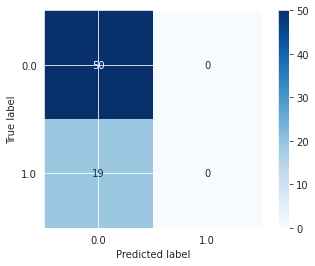

In [ ]:
clf = SVC(C=1.0, kernel='rbf')
clf.fit(x_treino, y_treino)
print(classification_report(y, clf.predict(Xkbest)))
print(precision_recall_fscore_support(y_teste, clf.predict(x_teste), average='micro'))
plot_confusion_matrix(clf, x_teste, y_teste, cmap='Blues')  
plt.show()